In [1]:
## Packages
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn import manifold

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score



Data preprocessing

In [2]:
script_dir = os.path.dirname("3.0 Isomap+Kmeans_DBSCAN_HDBSCAN.ipynb")
data_path = os.path.join(script_dir,'..','..','Data', 'RawData.csv')
data = pd.read_csv(data_path,encoding='latin1').dropna()

Eliminate zero columns

In [3]:
data = data.drop(columns=data.columns[(data == 0).all()])

Substitute zeros for the mean of the same column

In [4]:
mean = data.mean()
data = data.replace(0,np.nan)
data = data.fillna(mean)

Split data

In [5]:
train_validation, test = train_test_split(data, test_size = 0.2, random_state=12)
train, validation = train_test_split(train_validation, test_size = 0.2, random_state=99)

Scaling

In [6]:
scaler = StandardScaler().fit(train)
train_scaled = scaler.transform(train)

Dimensionality Reduction

In [7]:
iso = manifold.Isomap(n_neighbors=10,n_components=2)
data_iso = iso.fit_transform(train_scaled)

Plot Result

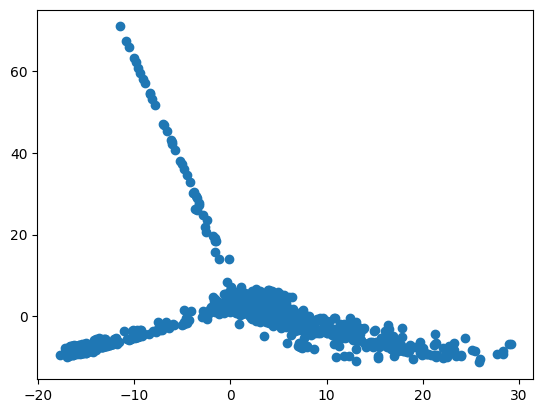

In [8]:
plt.scatter(data_iso[:, 0], data_iso[:, 1])
plt.show()

Clustering Techniques

T-Means

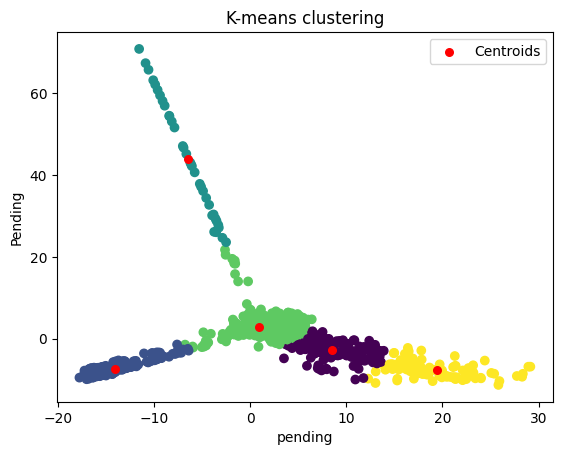

In [9]:

# Instantiate KMeans object
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
# Fit and predict clusters
y_kmeans_iso = kmeans.fit_predict(data_iso)
plt.scatter(data_iso[:, 0], data_iso[:, 1], c=y_kmeans_iso, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'red', label = 'Centroids')
plt.title('K-means clustering')
plt.xlabel('pending')
plt.ylabel('Pending')
plt.legend()
plt.show()

Evaluation of the clusters

In [10]:
# Silhouette Coefficient
score = silhouette_score(data_iso,y_kmeans_iso,metric='euclidean')
# Davies - Bouldin Index
db_index = davies_bouldin_score(data_iso,y_kmeans_iso)

In [13]:
print('Silhouette Coefficient: ',score) 
print('Davies - Bouldin Index: ', db_index)

Silhouette Coefficient:  0.6627282288107839
Davies - Bouldin Index:  0.45203134553182966


DBSCAN

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


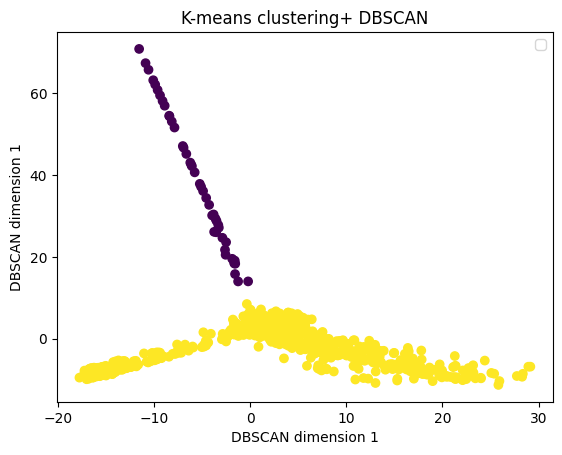

In [14]:
dbscan = DBSCAN(eps=5, min_samples=30)#
clusters = dbscan.fit_predict(data_iso)
# Plot
plt.scatter(data_iso[:, 0], data_iso[:, 1], c=clusters, cmap='viridis')
plt.title('K-means clustering+ DBSCAN')
plt.xlabel("DBSCAN dimension 1")
plt.ylabel("DBSCAN dimension 1")
plt.legend()
plt.show()

Evaluation of the clusters

In [15]:
score_1 = silhouette_score(data_iso,clusters,metric='euclidean')
db_index_1 = davies_bouldin_score(data_iso,clusters)

In [16]:
print('Silhouette Coefficient: ',score_1) 
print('Davies - Bouldin Index: ', db_index_1)

Silhouette Coefficient:  0.7027119608679405
Davies - Bouldin Index:  0.5880847628444552


HDBSCAN

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


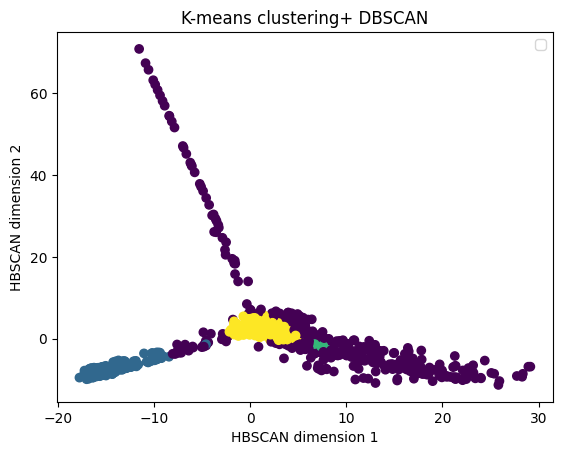

In [17]:
HDBSCAN=hdbscan.HDBSCAN(min_cluster_size=8, min_samples= 70)
HDBSCAN_labels = HDBSCAN.fit_predict(data_iso)

plt.scatter(data_iso[:, 0], data_iso[:, 1], c=HDBSCAN_labels, cmap='viridis')
plt.title('K-means clustering+ DBSCAN')
plt.xlabel("HBSCAN dimension 1")
plt.ylabel("HBSCAN dimension 2")
plt.legend()
plt.show()

Evaluation of clusters

In [18]:
score_2 = silhouette_score(data_iso,HDBSCAN_labels,metric='euclidean')
db_index_2 = davies_bouldin_score(data_iso,y_kmeans_iso)

In [19]:
print('Silhouette Coefficient: ',score_2)
print('Davies - Bouldin Index: ', db_index_2)

Silhouette Coefficient:  0.34081161899532997
Davies - Bouldin Index:  0.45203134553182966
